In [3]:
import scipy
import numpy as np
import pandas as pd
from scipy.special import gamma
import scipy.linalg as LA
import scipy.sparse as spSparse
import scipy.sparse.linalg as sLAa
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import scipy.io
import os
import math
import scipy.stats 
import csv
import mat73
import sklearn.metrics

patients = ['HUP64', 'HUP68','HUP70','HUP72','HUP78','HUP86','MAYO010','MAYO011','MAYO016','MAYO020']
num_seizures = 35 
window_length = 3

In [4]:
# pathname
main_pathname = 'c:/Users/yaoyu/Documents/Epilepsy_research/'

In [5]:
labels = ['HUP64-ictal-1','HUP68-ictal-1','HUP68-ictal-2','HUP68-ictal-3','HUP68-ictal-4','HUP68-ictal-5','HUP70-ictal-1','HUP70-ictal-2','HUP70-ictal-3','HUP70-ictal-4','HUP70-ictal-5','HUP70-ictal-6','HUP70-ictal-7','HUP70-ictal-8', 'HUP72-ictal-1', 'HUP78-ictal-1', 'HUP78-ictal-2', 'HUP78-ictal-3', 'HUP78-ictal-4', 'HUP78-ictal-5', 'HUP86-ictal-1', 'HUP86-ictal-2', 'MAYO010-ictal-1', 'MAYO010-ictal-3','MAYO011-ictal-1', 'MAYO011-ictal-2', 'MAYO016-ictal-1', 'MAYO016-ictal-2', 'MAYO016-ictal-5', 'MAYO016-ictal-6', 'MAYO020-ictal-1', 'MAYO020-ictal-2', 'MAYO020-ictal-3', 'MAYO020-ictal-4', 'MAYO020-ictal-6'] 
EEC = [632657, 819104, 836557, 911307, 933636, 968205, 62929, 65364, 66661, 252106, 277320, 277367, 325865, 328368, 0, 267376, 292659, 305960, 314000, 342228, 763898, 798468, 0, 0, 0, 0, 41639.01446, 298062.0994, 452586.826922, 466913.56625, 0, 0, 0, 0, 0]
UEO = [632666.73, 819104, 836557, 911307, 933639.01, 968211.34, 62930.48, 65365.04, 66663.17, 252114.37,277323.1, 277367.55, 325868.68, 328370.11, 0, 267375.83, 292666.07, 305959.2, 314031.75, 342228.12, 763899.75, 798469.62, 0, 0, 0, 0, 41645.10177, 298066.10, 452592.826922, 466922.56625, 0, 0, 0, 0, 0]
diff = np.array(UEO)-np.array(EEC)
d = {'patient': labels, 'EEC': EEC, 'UEO': UEO, 'Difference': diff}
data = pd.DataFrame(data=d)

In [6]:
# extracting the SOZ channels
data_dict = mat73.loadmat(main_pathname+'data/clinical_metadata.mat')
data_sets = ['HUP64_phaseII', 'HUP68_phaseII', 'HUP70_phaseII', 'HUP72_phaseII', 'HUP78_phaseII', 'HUP86_phaseII', 'Study 010', 'Study 011', 'Study 016', 'Study 020']
data_dict['subject']['IEEG']
all_channels = data_dict['subject']['Channels']
all_patients = data_dict['subject']['ID']
data_sets = ['HUP64', 'HUP68', 'HUP70', 'HUP72', 'HUP78', 'HUP86', 'MAYO010', 'MAYO011', 'MAYO016', 'MAYO020']
patient_idx = []
for dset in data_sets:
    patient_idx.append(all_patients.index(dset))
print(patient_idx)
all_channels = data_dict['subject']['Channels']
patient_chns = []
for idx in patient_idx:
    patient_chns.append(all_channels[idx])
#print(patient_chns)
soz = data_dict['subject']['Channels_Sz']
patient_soz = []
for idx in patient_idx:
    patient_soz.append(soz[idx])
#print(patient_soz)
patient_soz_flatten = []
for patient_sozi in patient_soz:
    if len(patient_sozi)==1:
        #print([patient_sozj for patient_sozj in patient_sozi])
        patient_soz_flatten.append([patient_sozj for patient_sozj in patient_sozi])
    else:
        #print([patient_sozj[0] for patient_sozj in patient_sozi])
        patient_soz_flatten.append([patient_sozj[0] for patient_sozj in patient_sozi])
#print(patient_soz_flatten)
patient_chns_flatten = []
for patient_chni in patient_chns:
#     print([patient_sozj[0] for patient_sozj in patient_sozi])
    patient_chns_flatten.append([patient_chnj[0] for patient_chnj in patient_chni])

#patient_chns_flatten
#print(patient_soz_flatten)
#print(patient_chns_flatten)
print(data_sets)
soz_idx = []
for pati in range(len(patient_chns_flatten)):
    ls = []
    for chn in patient_soz_flatten[pati]:
        try:
            thing_index = patient_chns_flatten[pati].index(chn)
            ls.append(patient_chns_flatten[pati].index(chn))
        except ValueError:
            thing_index = -1
    soz_idx.append(ls)
print(soz_idx)

[0, 2, 3, 4, 6, 8, 12, 13, 16, 18]
['HUP64', 'HUP68', 'HUP70', 'HUP72', 'HUP78', 'HUP86', 'MAYO010', 'MAYO011', 'MAYO016', 'MAYO020']
[[28, 36], [1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 71, 72, 73, 77, 78], [20], [18], [0], [14, 15, 16, 17, 22, 23, 24, 25, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 55, 56], [4, 5, 6, 7, 12, 13, 14, 15, 18, 19, 22, 23, 26, 27, 28, 29, 30, 36, 34, 35, 36], [5, 14, 15], [55, 26, 27, 28, 29, 21, 22], []]


In [7]:
class HaarWaveletTransform(object):
    def __init__(self, X):
        self._N = np.shape(X)
        self.X = np.array(X)
        #try:
        #    if np.size(self._N)==1:
        #        self._N = self._N[0]
        #    elif np.size(self._N)>1:
        #        if self._N[0] == 1 or self._N[1]==1:
        #            self.X = np.squeeze(X)
        #            self._N = np.size(self.X)
        #        else:
        #            raise Exception('dimErr')
        #except Exception as err:
        #    errStatus = err.args[0]
        #    if errStatus == 'dimErr':
        #        print('Only single dimensional arrays are acceptable')
        self._N = self._N[0]

    def normalize(self):
        mean = np.mean(self.X)
        self.X -= mean

    def _dwthaar(self, Signal):
        NUse = int(np.floor(np.size(Signal)/2))
        C = (Signal[:2*NUse:2] + Signal[1:2*NUse:2])/2
        S = Signal[:2*NUse:2] - C

        C = 2 * C / np.sqrt(2)
        S = -2 * S / np.sqrt(2)
        return C, S

    def transform(self):
        Nby2 = int(np.floor(self._N/2))
        W = np.zeros((Nby2,Nby2))
        D = np.zeros((Nby2,Nby2))
        j = self._N
        Signal = self.X
        for i in range(int(np.floor(np.log2(self._N)))):
            j = int(np.floor(j/2))
            w, d = self._dwthaar(Signal)
            W[i,:j] = w
            D[i,:j] = d
            Signal = w
        return W, D


class fracOrdUU(object):
    def __init__(self, numInp=[], numFract = 20, niter = 0, B = [], lambdaUse=0.5, verbose=0):
        self.verbose=verbose
        self._order = [] # fractional-order exponents
        self._numCh = []
        self._K = []
        self._numInp = numInp
        self._numFract = numFract
        self._lambdaUse = lambdaUse
        self._niter = niter
        self._BMat = B
        self._zVec = []
        self._AMat = [] #spatial matrix
        self._u = []
        self._performSparseComputation = False
        self._preComputedVars = []

        # if np.size(B)>0:
        #     if numInp > 0:
        #         if numInp != np.shape(B)[1] :
        #             print('size of B should be consistent with the number of unknown inputs')


    def _getFractionalOrder(self, x):
        numScales = int(np.floor(np.log2(self._K)))
        log_wavelet_scales = np.zeros((numScales,))
        scale = np.arange(1,numScales+1)

        Wt = HaarWaveletTransform(x)
        #print(Wt._N)
        Wt.normalize()
        _, W = Wt.transform()
        j = int(np.floor(self._K/2))
        for i in range(numScales-1):
            y = W[i,:j]
            variance = np.var(y, ddof=1) # for unbiased estimate
            log_wavelet_scales[i] = np.log2(variance + 1e-10)
            j = int(np.floor(j/2))
        p = np.polyfit(scale[:numScales-1], log_wavelet_scales[:numScales-1], 1)
        return p[0]/2


    def _estimateOrder(self, X):
        self._order = np.empty((self._numCh,))

        for i in range(self._numCh):
            self._order[i] = self._getFractionalOrder(X[i,:])

    def _updateZVec(self, X):
        self._zVec = np.empty((self._numCh, self._K))
        j = np.arange(0,self._numFract+1)
        for i in range(self._numCh):
            preFactVec = gamma(-self._order[i]+j)/gamma(-self._order[i]) / gamma(j+1)
            y = np.convolve(X[i,:], preFactVec)
            self._zVec[i,:] = y[:self._K]

    def _setHeuristicBMat(self, A):
        B = np.zeros((self._numCh, self._numCh))
        B[np.abs(A)>0.01] = A[np.abs(A)>0.01]
        _, r = LA.qr(B)
        colInd = np.where(np.abs(np.diag(r))>1e-7)
        if np.size(colInd[0])<self._numInp:
            self._BMat = np.vstack((np.eye(self._numInp),
                        np.zeros((self._numCh-self._numInp, self._numInp))))
        else:
            colInd = colInd[0][:self._numInp]
            self._BMat = B[:,colInd]
        if np.linalg.matrix_rank(B) < self._numInp:
            raise Exception('rank deficient B')


    def _performLeastSq(self, Y, X):
        # X and Y are shape of (K,numCh)
        # A = [a1, a2,...,an]
        # Y = X*A.T + E
        # ai = Sigma_X^-1 * E[Xyi.T]
        XUse = np.vstack((np.zeros((1,self._numCh)), X[:-1,:]))
        A = np.matmul(np.matmul(Y.T, XUse), LA.inv(np.matmul(XUse.T, XUse)))
        mse = LA.norm(Y - np.matmul(XUse, A.T),axis=0)**2 / self._K
        return A, np.mean(mse)

    def _factor(self, A, rho):
        m, n = np.shape(A)
        if self._performSparseComputation:
            if m >= n:
                L = LA.cholesky(np.matmul(A.T, A) + rho*spSparse.eye(n), lower=True)
            else:
                L = LA.cholesky(spSparse.eye(m) + 1/rho * np.matmul(A, A.T), lower=True)

            L = spSparse.csc_matrix(L)
            U = spSparse.csc_matrix(L.T)
        else:
            if m >= n:
                L = LA.cholesky(np.matmul(A.T, A) + rho*np.eye(n), lower=True)
            else:
                L = LA.cholesky(np.eye(m) + 1/rho * np.matmul(A, A.T), lower=True)
            U = L.T
        return L, U

    def _shrinkage(self, x, kappa):
        return np.maximum(0, x-kappa) - np.maximum(0, -x - kappa)

    def _objective(self, A, b, lambdaUse, x, z):
        return 0.5 * np.sum((np.matmul(A, x)-b)**2) + lambdaUse*LA.norm(z,ord=1)

    class _history(object):
        def __init__(self, N):
            self._objval = np.empty((N,))
            self._r_norm = np.empty((N,))
            self._s_norm = np.empty((N,))
            self._eps_pri = np.empty((N,))
            self._eps_dual = np.empty((N,))


    class _preComputedVars_(object):
        def __init__(self):
            self._lasso_L = []
            self._lasso_U = []
            self._lasso_LInv = []
            self._lasso_UInv = []

        def _updateLassoLUMat(self, A, rho):
            self._lasso_L, self._lasso_U = fracOrdUU()._factor(A, rho)
            self._lasso_LInv = LA.inv(self._lasso_L)
            self._lasso_UInv = LA.inv(self._lasso_U)


    def _getLassoSoln(self, b, lambdaUse):

        # code borrowed from
        # https://web.stanford.edu/~boyd/papers/admm/lasso/lasso.html
        A = self._BMat
        b = np.reshape(b, (np.size(b),1))
        MAX_ITER = 100
        ABSTOL = 1e-4
        RELTOL = 1e-2

        m, n = np.shape(A)
        Atb = np.matmul(A.T, b)
        rho = 1/lambdaUse
        alpha = 1

        z = np.zeros((n,1))
        u = np.zeros((n,1))
        # L, U = self._factor(A, rho)
        LInv = self._preComputedVars._lasso_LInv
        UInv = self._preComputedVars._lasso_UInv

        history = self._history(MAX_ITER)
        for k in range(MAX_ITER):
            # x-update
            q = Atb + rho * (z-u)
            if self._performSparseComputation:
                if m >= n: # is skinny
                    x = sLA.inv(U) *  (sLA.inv(L) * q)
                else: # if fat
                    x = q/rho - np.matmul(A.T, sLA.inv(U) *
                        (sLA.inv(L) * np.matmul(A, q)))/rho**2
            else:
                if m >= n: # is skinny
                    x = np.matmul(UInv, np.matmul(LInv, q))
                    # x = LA.solve(U, LA.solve(L, q))
                else: # if fat
                    x = q/rho - np.matmul(A.T, np.matmul(LA.inv(U),
                        np.matmul(LA.inv(L), np.matmul(A, q))))/rho**2

            zold = np.array(z)
            x_hat = alpha*x + (1-alpha)*zold
            z = self._shrinkage(x_hat + u, lambdaUse/rho)

            # u-update
            u += x_hat - z

            history._objval[k] = self._objective(A, b, lambdaUse, x, z)
            history._r_norm[k] = LA.norm(x-z)
            history._s_norm[k] = LA.norm(-rho*(z-zold))
            history._eps_pri[k] = (np.sqrt(n)*ABSTOL
                + RELTOL*np.max((LA.norm(x), LA.norm(-z))))
            history._eps_dual[k] = np.sqrt(n)*ABSTOL + RELTOL*LA.norm(rho*u)

            if (history._r_norm[k] < history._eps_pri[k] and
                history._s_norm[k] < history._eps_dual[k]):
                break
        return np.squeeze(z)

    def fit(self, X):
        # X must be data in the shape of (sensors, time)
        X = np.array(X,dtype='float')
        self._numCh, self._K = np.shape(X)
        if np.size(self._numInp) == 0:
            self._numInp = int(np.floor(self._numCh/2))
        self._AMat = np.empty((self._niter+1, self._numCh, self._numCh))
        self._u = np.zeros((self._numInp,self._K))
        #try:
        #    if self._numCh == 1:
        #        raise Exception('oneSensor')
        #    if self._K < self._numCh:
        #        raise Exception('lessData')
        #    if np.size(self._BMat)>0:
        #        if np.shape(self._BMat) != (self._numCh, self._numInp):
        #            raise Exception('BMatDim')

        self._estimateOrder(X)
        self._updateZVec(X)
        self._AMat[0,:,:], mse = self._performLeastSq(self._zVec.T, X.T)

        if np.size(self._BMat) == 0:
            self._setHeuristicBMat(self._AMat[0,:,:])

#           initiate precomputed variables process,
#           compute all variable need to be computed exactly, again and again.
        self._preComputedVars = self._preComputedVars_()
        self._preComputedVars._updateLassoLUMat(self._BMat, 1/self._lambdaUse)

        #t0 = time.time()
        if self.verbose > 0:
            print('beginning mse = %f'%(mse))
        mseIter = np.empty((self._niter+1,))
        mseIter[0] = mse
        for iterInd in range(self._niter):
            for kInd in range(1,self._K):
                yUse = self._zVec[:,kInd] - np.matmul(self._AMat[iterInd,:,:], X[:,kInd-1])
                self._u[:,kInd] = self._getLassoSoln(yUse, self._lambdaUse)
                    # clf = linear_model.Lasso(alpha=self._lambdaUse)
                    # clf.fit(self._BMat * np.sqrt(self._numCh), yUse* np.sqrt(self._numCh))
                    # self._u[:,kInd] = clf.coef_

            self._AMat[iterInd+1,:,:],mseIter[iterInd+1] = self._performLeastSq((self._zVec - np.matmul(self._BMat, self._u)).T, X.T)
            if self.verbose>0:
              print('iter ind = %d, mse = %f'%(iterInd, mseIter[iterInd+1]))
        #print('time taken = %f'%(time.time()-t0))


       # except Exception as err:
       #     errStatus = err.args[0]
       #     if errStatus == 'oneSensor':
       #         print('The number of sensors must be > 1, retry...')
       #     elif errStatus == 'lessData':
       #         print('The number of data points are less than number of sensors, retry...')
       #     elif errStatus == 'BMatDim':
       #         print('size of B should be consistent with the number of channels and number of inputs')
       #     else:
       #         print('some different error')


In [8]:
def adjust_fontsize(num_subplots, max_fontsize=12):
    """Adjust fontsize based on the number of subplots."""
    # Determine base fontsize based on the total number of subplots
    return max(6, max_fontsize - (num_subplots // 10))

In [9]:
def reconstruct_FOS(alpha, A, X, num_chns, sampling_rate, window_length):
            
    infit = 5  # the maximum number of states in the past should be considered          
    numStep = 1 # number of steps ahead
    p = 1 # number of past states
    TSteps = sampling_rate*window_length
    
    xPred = np.zeros((num_chns, TSteps*numStep))
    xPred[:, 0:numStep] = X[:, 0:numStep]


    for i in range(1,TSteps):
        XTemp = np.zeros((num_chns, TSteps*numStep))
        XTemp[:, 0:i*numStep] = X[:, 0:i*numStep]
        for stepInd in range(numStep):
            for chInd in range(num_chns):
                alpha_inst = alpha[chInd]
                #check whether alpha is fractional
                if math.ceil(alpha_inst) != alpha_inst:
                    trailLen = np.min(np.array([infit, i*numStep + stepInd - 1]))
                    j = np.arange(1, trailLen + 1)
                    preFact = scipy.special.gamma(-alpha_inst + j) / (scipy.special.gamma(-alpha_inst) * scipy.special.gamma(j + 1))
                    XTemp[chInd, i* numStep + stepInd] = XTemp[chInd, i*numStep + stepInd] - np.sum(XTemp[chInd, i*numStep + stepInd - j] * preFact)

            XUse = np.zeros((num_chns,p))
            for pInd in range(p):
                if i*numStep + stepInd - pInd < 1:
                    break
                XUse[:, pInd] = XTemp[:, i*numStep + stepInd - pInd]

            XTemp[:, i*numStep + stepInd] = XTemp[:, i*numStep + stepInd] + np.dot(np.squeeze(A), XUse[:, pInd]) 

        xPred[:, (i)*numStep:(i+1)*numStep] = XTemp[:, (i)*numStep:(i+1)*numStep]
    return xPred

In [ ]:
# Part 1
# compute the FOS parameters for both ictal data and interictal snapshots for every patient and every ictal snapshot
# you should only have to run this one time.
import gc 

seiz_num = 0
patient_num = 0
for patient in patients:
    soz_idx_pat = np.unique(np.array(soz_idx[patient_num]))
    gc.collect()
    for seizure in range(9):
        if os.path.exists(main_pathname+'Data/' + patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat'):
            #ictal data
            #create directories for results 
            results = main_pathname +'Results_3sec/'+patient+'/'+'ictal-block-'+str(seizure)
            try:
                os.makedirs(results)
            except FileExistsError:
                pass
            try:
                os.makedirs(results+'/Reconstructions/Ictal/')
                os.makedirs(results+'/Reconstructions/Interictal/')
            except FileExistsError:
                pass
            #load data into python 
            struc = scipy.io.loadmat(main_pathname+'Data/' + patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat')
            sampling_rate = struc['Fs'][0][0]
            sampling_rate = int(np.ceil(sampling_rate))
            evData = struc['evData']
            #print(struc['channels_soz'])
            num_chns = evData.shape[0]
            #For patient Mayo020 the soz_idx_pat is empty, handled accordingly below 
            if soz_idx_pat.size != 0: 
                non_soz_idx_pat = np.delete(np.arange(num_chns), soz_idx_pat)
            else:
                non_soz_idx_pat = np.arange(num_chns)

            #plot the raw data 
            # fontsize = adjust_fontsize(len(non_soz_idx_pat))
            # time = np.arange(0, (evData.shape[1]-20*sampling_rate))/sampling_rate
            # plt.subplots_adjust(hspace=0.5)
            # nrows = int(np.ceil(np.sqrt(len(non_soz_idx_pat))))
            # fig, axes = plt.subplots(nrows=nrows, ncols=nrows, figsize=(12,12), constrained_layout=True)
            # axes = axes.flatten()
            # plotting the raw data (non-SOZ)
            # for i, (chn, ax) in enumerate(zip(non_soz_idx_pat, axes)):
            #     ax.plot(time, evData[chn,0:evData.shape[1]-20*sampling_rate], color='blue',linewidth=.5)
            #     cleaned_string = patient_chns[patient_num][chn][0].replace("EEG", "").replace("-Ref", "")
            #     ax.set_title(f'{cleaned_string}',fontsize=fontsize)
            #     ax.set_xlabel('Time',fontsize=fontsize)
            #     ax.set_ylabel('uV',fontsize=fontsize)
            #     ax.tick_params(axis='both', which='major',labelsize=fontsize)
            #ax.legend([p1[0]], ['non-soz'], loc='upper left')
            # for j in range(i+1, len(axes)):
                # fig.delaxes(axes[j])
            # plt.tight_layout()
            # plt.savefig(results+'/'+'non_soz_evData.png', format='png', dpi=600, transparent=True)
            # plt.close()

            # plotting the raw data (SOZ)
            # plt.subplots_adjust(hspace=0.5)
            # nrows = int(np.ceil(np.sqrt(len(soz_idx_pat))))
            # if nrows<2:
            #     fontsize = adjust_fontsize(len(soz_idx_pat))
            #     fig, axes = plt.subplots() 
            #     for chn in soz_idx_pat:
            #         ax.plot(time,evData[chn,0:evData.shape[1]-20*sampling_rate], color='red',linewidth=.5)
            #         cleaned_string = patient_chns[patient_num][chn][0].replace("EEG", "").replace("-Ref", "")
            #         ax.set_title(f'{cleaned_string}',fontsize=fontsize)
            #         ax.set_xlabel('Time',fontsize=fontsize)
            #         ax.set_ylabel('uV',fontsize=fontsize)
            #         ax.tick_params(axis='both', which='major',labelsize=fontsize)
            #     plt.tight_layout()
            #     plt.savefig(results+'/'+'soz_evData.png', format='png', dpi=600, transparent=True)
            #     plt.close()
            # else:
            #     fontsize = adjust_fontsize(len(soz_idx_pat))
            #     fig, axes = plt.subplots(nrows=nrows, ncols=nrows) 
            #     axes = axes.flatten()
            #     for i, (chn, ax) in enumerate(zip(soz_idx_pat, axes)):
            #         ax.plot(time,evData[chn,0:evData.shape[1]-20*sampling_rate], color='red',linewidth=.5)
            #         cleaned_string = patient_chns[patient_num][chn][0].replace("EEG", "").replace("-Ref", "")
            #         ax.set_title(f'{cleaned_string}',fontsize=fontsize)
            #         ax.set_xlabel('Time',fontsize=fontsize)
            #         ax.set_ylabel('uV',fontsize=fontsize)
            #         ax.tick_params(axis='both', which='major',labelsize=fontsize)
            #     #ax.legend([p2[0]], ['soz'], loc='upper left')
            #     for j in range(i+1, len(axes)):
            #         fig.delaxes(axes[j])
            #     plt.tight_layout()
            #     plt.savefig(results+'/'+'soz_evData.png', format='png', dpi=600, transparent=True)
            #     plt.close()
            
            # compute the FOS from data and extract the eigenvalues, eigenvectors
            start_idx = 0
            num_windows = int(evData.shape[1]/(window_length*sampling_rate))
            xPred = np.zeros((num_chns,num_windows*window_length*sampling_rate))
            eigenvalues = np.zeros((num_chns,num_windows), dtype=np.complex128)
            eigenvectors = np.zeros((num_chns,num_chns,num_windows), dtype=np.complex128)
            alpha = np.zeros((num_chns,num_windows))
            A = np.zeros((num_chns, num_chns, num_windows))
            A_0 = np.zeros((num_chns, num_chns, num_windows))
            for window in range(num_windows):
                #X is windowed data
                X = evData[:,start_idx:start_idx+sampling_rate*window_length]
                meanX = np.mean(X, axis=1)
                X = X.T - meanX
                X = X.T
                fModel = fracOrdUU(verbose=-1)
                fModel.fit(X)
                fModel._AMat # A matrix
                fModel._order # fractional-order exponents
                # force to zero any fractional-order exponents that are small
                for i in range(len(fModel._order)):
                    if np.absolute(fModel._order[i])<0.01:
                        fModel._order[i] = 0
                alpha[:,window] = fModel._order
                A[:,:,window] = np.squeeze(fModel._AMat)
                xPred[:,start_idx:start_idx+sampling_rate*window_length] = reconstruct_FOS(alpha[:,window], A[:,:,window], X, num_chns, sampling_rate,window_length)
                 

                # Calculate the eigenvalues
                v=np.zeros((num_chns))
                for chn in range(num_chns):
                    if fModel._order[chn]==0:
                        v[chn] = 1
                    else:
                        v[chn]=gamma(1-fModel._order[chn])/gamma(-fModel._order[chn])
                D=np.diag(v)
                A_0[:,:,window] = A[:,:,window] - D
                eigenvalues[:,window], eigenvectors[:,:,window] = np.linalg.eig(A_0[:,:,window])
                start_idx = start_idx+sampling_rate


            eec = int(20/window_length)
            onset = math.floor((eec*window_length+math.floor(diff[seiz_num]))/window_length)
            offset = math.floor((evData.shape[1]-20*sampling_rate)/(sampling_rate*window_length))

            ictal_data = {"alpha": alpha, "A": A, "A_0":A_0, "eigenvalues": eigenvalues,"eigenvectors": eigenvectors,"onset": onset, "offset": offset, "eec": eec}
            scipy.io.savemat(main_pathname+'Data/'+ patient+'/'+'ictal-block-'+str(seizure)+"_ictal_parameters_.mat", ictal_data)
            
            # Check reconstruction
            # plt.subplots_adjust(hspace=0.5)
            # nrows = int(np.ceil(np.sqrt(num_chns)))
            # fontsize = adjust_fontsize(num_chns)
            # fig, axes = plt.subplots(nrows=nrows, ncols=nrows, figsize = (12,12))
            # time = np.arange(0,num_windows*window_length*sampling_rate)/sampling_rate
            # axes = axes.flatten()
            # for i, (chn, ax) in enumerate(zip(patient_chns[patient_num], axes)):
            #     ax.plot(time,xPred[i,:], c='purple',label='reconstructed signals',linewidth=0.5)
            #     ax.plot(time,evData[i,0:num_windows*sampling_rate*window_length], color = 'blue', alpha=0.3, label = 'iEEG data',linewidth=0.5)
            #     cleaned_string = chn[0].replace("EEG", "").replace("-Ref", "")
            #     ax.set_title(f'{cleaned_string}',fontsize=fontsize)
            #     ax.set_xlabel('Time',fontsize=fontsize)
            #     ax.set_ylabel('uV',fontsize=fontsize)
            #     ax.tick_params(axis='both', which='major',labelsize=fontsize)
            # for j in range(i+1, len(axes)):
            #     fig.delaxes(axes[j])
            # #ax.legend(loc='lower left')
            # plt.tight_layout()
            # plt.savefig(results+'/reconstructed_ictal_signals.png', format='png', dpi=300, transparent=True)
            # plt.close() 

            # make individual plots of each channel
            # r_squared = np.zeros((num_chns,1))
            # rmse = np.zeros((num_chns,1))
            # for i in range(num_chns):
            #     plt.subplots_adjust(hspace=0.5)
            #     fig, ax = plt.subplots()
            #     ax.plot(time,xPred[i,:], c='purple',label='reconstructed signals',linewidth=0.5)
            #     ax.plot(time,evData[i,0:num_windows*sampling_rate*window_length], color = 'blue', alpha=0.3, label = 'iEEG data',linewidth=0.5)
            #     r_squared[i] = sklearn.metrics.r2_score(xPred[i,:], evData[i,0:num_windows*sampling_rate*window_length])
            #     rmse[i] = sklearn.metrics.mean_squared_error(xPred[i,:], evData[i,0:num_windows*sampling_rate*window_length], squared=False)
            #     cleaned_string = patient_chns[patient_num][i][0].replace("EEG", "").replace("-Ref", "")
            #     ax.set_title(f'{cleaned_string}',fontsize=fontsize)
            #     ax.set_xlabel('Time',fontsize=fontsize)
            #     ax.set_ylabel('uV',fontsize=fontsize)
            #     ax.tick_params(axis='both', which='major',labelsize=fontsize)
            #     plt.tight_layout()
            #     plt.savefig(results+'/Reconstructions/Ictal/reconstructed_ictal_'+ cleaned_string +'.png', format='png', dpi=300, transparent=True)
            #     plt.close() 

            # histogram of r-squared and rmse
            # plt.figure(figsize=(10, 6))
            # plt.hist(r_squared, bins=10, color='skyblue', edgecolor='black')
            # plt.xlabel('R-squared')
            # plt.ylabel('Frequency')
            # plt.title('Histogram of R-squared Values')
            # #plt.xlim(0, 1)
            # plt.grid(axis='y', linestyle='--', alpha=0.7)
            # plt.tight_layout()
            # plt.savefig(results+'/r-squared_values_ictal_signals.png', format='png', dpi=300, transparent=True)
            # plt.close() 

            # plt.figure(figsize=(10, 6))
            # plt.hist(rmse, bins=10, color='skyblue', edgecolor='black')
            # plt.xlabel('RMSE')
            # plt.ylabel('Frequency')
            # plt.title('Histogram of RMSE')
            # #plt.xlim(0, 1)
            # plt.grid(axis='y', linestyle='--', alpha=0.7)
            # plt.tight_layout()
            # plt.savefig(results+'/rmse_values_ictal_signals.png', format='png', dpi=300, transparent=True)
            # plt.close()

            # interictal data
            struc = scipy.io.loadmat(main_pathname+'Data/'+patient+'/'+patient+'-interictal-block-'+str(seizure)+'.mat')
            sampling_rate = struc['Fs'][0][0]
            sampling_rate = int(np.ceil(sampling_rate))
            evData = struc['evData']
            num_chns = evData.shape[0]
            fontsize = adjust_fontsize(num_chns)
            time = np.arange(0, evData.shape[1])/sampling_rate
            plt.subplots_adjust(hspace=0.5)
            nrows = int(np.ceil(np.sqrt(num_chns)))
            fig, axes = plt.subplots(nrows=nrows, ncols=nrows, figsize=(12,12), constrained_layout=True)
            axes = axes.flatten()
            # # plot the raw data
            # for i, (chn, ax) in enumerate(zip(patient_chns[patient_num], axes)):
            #     ax.plot(time, evData[i,:], color='blue',linewidth=.5)
            #     cleaned_string = chn[0].replace("EEG", "").replace("-Ref", "")
            #     ax.set_title(f'{cleaned_string}',fontsize=fontsize)
            #     ax.set_xlabel('Time',fontsize=fontsize)
            #     ax.set_ylabel('uV',fontsize=fontsize)
            #     ax.tick_params(axis='both', which='major',labelsize=fontsize)
            # for j in range(i+1, len(axes)):
            #     fig.delaxes(axes[j])
            # plt.tight_layout()
            # plt.savefig(results+'/'+'interictal_evData.png', format='png', dpi=300, transparent=True)
            # plt.close()

            
            # compute the FOS and extract the eigenvalues for the interictal data
            start_idx = 0
            num_windows = int(evData.shape[1]/sampling_rate)
            xPred = np.zeros((num_chns,num_windows*window_length*sampling_rate))
            eigenvalues = np.zeros((num_chns,num_windows), dtype=np.complex128)
            eigenvectors = np.zeros((num_chns,num_chns,num_windows), dtype=np.complex128)
            alpha = np.zeros((num_chns,num_windows))
            A = np.zeros((num_chns, num_chns, num_windows))
            A_0 = np.zeros((num_chns, num_chns, num_windows))
            for window in range(num_windows):
                #X is windowed data
                X = evData[:,start_idx:start_idx+sampling_rate*window_length]
                meanX = np.mean(X, axis=1)
                X = X.T - meanX
                X = X.T
                fModel = fracOrdUU(verbose=-1)
                fModel.fit(X)
                fModel._AMat # A matrix
                fModel._order # fractional-order exponents
                # force to zero any fractional-order exponents that are small
                for i in range(len(fModel._order)):
                    if np.absolute(fModel._order[i])<0.01:
                        fModel._order[i] = 0
                alpha[:,window] = fModel._order
                A[:,:,window] = np.squeeze(fModel._AMat)
                xPred[:,start_idx:start_idx+sampling_rate*window_length] = reconstruct_FOS(alpha[:,window], A[:,:,window], X, num_chns, sampling_rate, window_length)
                
                # Calculate the eigenvalues
                v=np.zeros((num_chns))
                for chn in range(num_chns):
                    if fModel._order[chn]==0:
                        v[chn] = 1
                    else:
                        v[chn]=gamma(1-fModel._order[chn])/gamma(-fModel._order[chn])
                D=np.diag(v)
                A_0[:,:,window] = A[:,:,window] - D
                eigenvalues[:,window], eigenvectors[:,:,window] = np.linalg.eig(A[:,:,window] - D)
                start_idx = start_idx+sampling_rate

            # Check reconstruction
            # plt.subplots_adjust(hspace=0.5)
            # nrows = int(np.ceil(np.sqrt(num_chns)))
            # fontsize = adjust_fontsize(num_chns)
            # fig, axes = plt.subplots(nrows=nrows, ncols=nrows)
            # time = np.arange(0,num_windows*window_length*sampling_rate)/sampling_rate
            # axes = axes.flatten()
            # for i, (chn, ax) in enumerate(zip(patient_chns[patient_num], axes)):
            #     ax.plot(time,xPred[i,:], c='purple',label='reconstructed signals', linewidth=0.5)
            #     ax.plot(time,evData[i,0:num_windows*sampling_rate*window_length], color = 'blue', alpha=0.3,label='iEEG data', linewidth=0.5)
            #     cleaned_string = chn[0].replace("EEG", "").replace("-Ref", "")
            #     ax.set_title(f'{cleaned_string}',fontsize=fontsize)
            #     ax.set_xlabel('Time',fontsize=fontsize)
            #     ax.set_ylabel('uV',fontsize=fontsize)
            #     ax.tick_params(axis='both', which='major',labelsize=fontsize)
            # for j in range(i+1, len(axes)):
            #     fig.delaxes(axes[j])
            # #ax.legend(loc='lower left')
            # plt.tight_layout()
            # plt.savefig(results+'/reconstructed_interictal_signals.png', format='png', dpi=300, transparent=True)
            # plt.close() 


            # make individual plots of each channel
            # r_squared = np.zeros((num_chns,1))
            # rmse = np.zeros((num_chns,1))
            # for i in range(num_chns):
            #     plt.subplots_adjust(hspace=0.5)
            #     fig, ax = plt.subplots()
            #     ax.plot(time,xPred[i,:], c='purple',label='reconstructed signals',linewidth=0.5)
            #     ax.plot(time,evData[i,0:num_windows*sampling_rate*window_length], color = 'blue', alpha=0.3, label = 'iEEG data',linewidth=0.5)
            #     r_squared[i] = sklearn.metrics.r2_score(xPred[i,:], evData[i,0:num_windows*sampling_rate*window_length])
            #     rmse[i] = sklearn.metrics.mean_squared_error(xPred[i,:], evData[i,0:num_windows*sampling_rate*window_length], squared=False)
            #     cleaned_string = patient_chns[patient_num][i][0].replace("EEG", "").replace("-Ref", "")
            #     ax.set_title(f'{cleaned_string}',fontsize=fontsize)
            #     ax.set_xlabel('Time',fontsize=fontsize)
            #     ax.set_ylabel('uV',fontsize=fontsize)
            #     ax.tick_params(axis='both', which='major',labelsize=fontsize)
            #     plt.tight_layout()
            #     plt.savefig(results+'/Reconstructions/Interictal/reconstructed_interictal_'+ cleaned_string +'.png', format='png', dpi=300, transparent=True)
            #     plt.close() 
            
            # # histogram of r-squared and rmse
            # plt.figure(figsize=(10, 6))
            # plt.hist(r_squared, bins=10, color='skyblue', edgecolor='black')
            # plt.xlabel('R-squared')
            # plt.ylabel('Frequency')
            # plt.title('Histogram of R-squared Values')
            # #plt.xlim(0, 1)
            # plt.grid(axis='y', linestyle='--', alpha=0.7)
            # plt.tight_layout()
            # plt.savefig(results+'/r-squared_values_interictal_signals.png', format='png', dpi=300, transparent=True)
            # plt.close() 

            # plt.figure(figsize=(10, 6))
            # plt.hist(rmse, bins=10, color='skyblue', edgecolor='black')
            # plt.xlabel('RMSE')
            # plt.ylabel('Frequency')
            # plt.title('Histogram of RMSE')
            # #plt.xlim(0, 1)
            # plt.grid(axis='y', linestyle='--', alpha=0.7)
            # plt.tight_layout()
            # plt.savefig(results+'/rmse_values_interictal_signals.png', format='png', dpi=300, transparent=True)
            # plt.close()

            # save FOS interictal parameters     
            interictal_data ={'A': A, 'A_0':A_0,'alpha': alpha, 'eigenvalues': eigenvalues, 'eigenvectors': eigenvectors}
            scipy.io.savemat(main_pathname+'Data/'+ patient+'/interictal-block-'+str(seizure)+"_interictal_parameters.mat", interictal_data)   
            
            del X, xPred, A, A_0, eigenvalues, eigenvectors, alpha
            seiz_num = seiz_num + 1
    patient_num = patient_num + 1



C:\Users\yaoyu\AppData\Local\Temp\ipykernel_29972\1363628981.py:56: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\yaoyu\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\yaoyu\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\yaoyu\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\yaoyu\miniconda3\Lib\site-packages\sklearn\metrics\_regres

T-test Results for Eigenvalues (Pre-Ictal vs. Ictal):
T-statistic: -2.786874378184825
P-value: 0.005411988966267606


C:\Users\yaoyu\AppData\Local\Temp\ipykernel_23476\1068734356.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Pre-Ictal', 'Ictal'], showmeans=True)


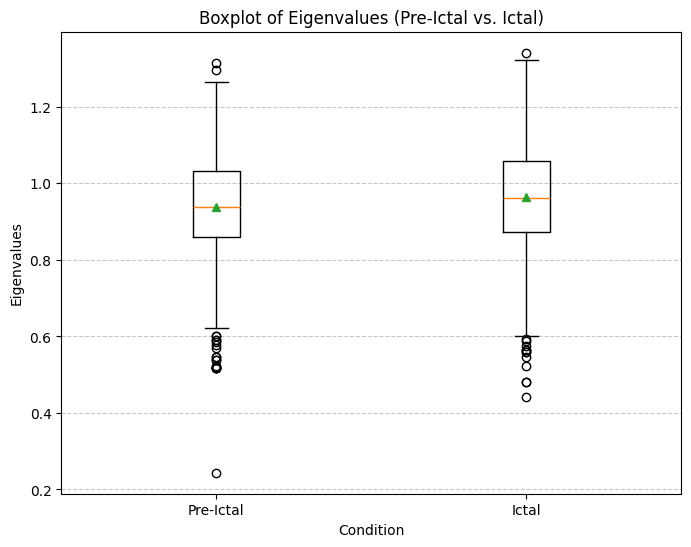

In [10]:
from scipy.stats import ttest_ind
pre_ictal_start = 0
pre_ictal_stop = 10
onset = 20
ictal_start = onset
ictal_stop = onset + 10
patient = 'HUP72'
seizure = 1
if os.path.exists(main_pathname+'Data/'+patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat'):
    results =main_pathname+'Results/'+patient+'/'+'/ictal-block-'+str(seizure)
    ictal_data = scipy.io.loadmat(main_pathname+'Data/'+patient+'/ictal-block-'+str(seizure)+"_ictal_parameters_.mat")
    eigenvalues = ictal_data["eigenvalues"]
    alpha = ictal_data["alpha"]
    eec = ictal_data["eec"][0][0]
    onset = ictal_data["onset"][0][0]
    offset = ictal_data["offset"][0][0]
    num_chns = ictal_data["A"].shape[0]
# Perform t-test for average eigenvalues across all channels

# Extract the eigenvalues for pre-ictal and ictal periods
pre_ictal_eigenvalues = np.absolute(eigenvalues[:, pre_ictal_start:pre_ictal_stop]).flatten()
ictal_eigenvalues = np.absolute(eigenvalues[:, ictal_start:ictal_stop]).flatten()

t_stat, p_value = ttest_ind(pre_ictal_eigenvalues, ictal_eigenvalues, equal_var=False)

# Print the results
print("T-test Results for Eigenvalues (Pre-Ictal vs. Ictal):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Combine data for boxplot
data = [pre_ictal_eigenvalues, ictal_eigenvalues]

# Plot the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['Pre-Ictal', 'Ictal'], showmeans=True)
plt.xlabel('Condition')
plt.ylabel('Eigenvalues')
plt.title('Boxplot of Eigenvalues (Pre-Ictal vs. Ictal)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig(results + '/boxplot_eigenvalues_preictal_vs_ictal.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()



In [ ]:
# Part 2

# plotting the results from the saved data (ictal v. pre-ictal) (Original Code) preictal vs ictal 
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})

with open(main_pathname+'/Results/summary.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Patient', 'Seizure Number', 'Eigenvalue Statistic', 'Eigenvalue p-value', 'Average Eigenvalue Statistic', 'Average Eigenvalue p-value', 'Alpha Statistic', 'Alpha p-value', 'Average Alpha Statistic','Average Alpha p-value'])

    eigenvalue_statistic = []
    eigenvalue_pvalue = []
    average_eigenvalue_statistic = []
    average_eigenvalue_pvalue = []


    alpha_statistic = []
    alpha_pvalue = []
    average_alpha_statistic = []
    average_alpha_pvalue = []

    pre_ictal_average_eigenvalue = []
    pre_ictal_average_alpha = []
    ictal_average_eigenvalue = []
    ictal_average_alpha = []

    window_length = 1
    seiz_num = 0
    patient_num = 0
    for patient in patients:
        soz_idx_pat = np.unique(np.array(soz_idx[patient_num]))
        for seizure in range(9):
            if os.path.exists(main_pathname+'Data/'+patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat'):
                results =main_pathname+'Results/'+patient+'/'+'/ictal-block-'+str(seizure)
                ictal_data = scipy.io.loadmat(main_pathname+'Data/'+patient+'/ictal-block-'+str(seizure)+"_ictal_parameters_.mat")
                eigenvalues = ictal_data["eigenvalues"]
                alpha = ictal_data["alpha"]
                eec = ictal_data["eec"][0][0]
                onset = ictal_data["onset"][0][0]
                offset = ictal_data["offset"][0][0]
                num_chns = ictal_data["A"].shape[0]
                pre_ictal_start = 0
                pre_ictal_stop = 10
                ictal_start = onset
                ictal_stop = onset + 10

                # plot the histogram of the eigenvalues (preictal)
                color_array = ['blue' for x in range(ictal_stop)]
                plt.hist(np.absolute(eigenvalues[:,pre_ictal_start:pre_ictal_stop]), bins=10, range=(0,2), color=color_array[pre_ictal_start:pre_ictal_stop])  # Adjust the number of bins as needed
                plt.axvline(np.absolute(eigenvalues[:,pre_ictal_start:pre_ictal_stop]).mean(), color='k', linestyle='dashed', linewidth=1)
                plt.xlabel('Eigenvalues')
                plt.ylabel('Frequency')
                plt.title('Histogram of Eigenvalues Pre-ictal')
                plt.savefig(results+'/'+'histogram_eigenvalues_interictal.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()

                #  Wilcoxon paired test for eigenvalues pre-seizure and during seizure
                eigenvalue_result = scipy.stats.wilcoxon(np.absolute(eigenvalues[:,pre_ictal_start:pre_ictal_stop]), np.absolute(eigenvalues[:,ictal_start:ictal_stop]))
                eigenvalue_statistic.append(eigenvalue_result[0])
                eigenvalue_pvalue.append(eigenvalue_result[1])

                average_eigenvalue_result = scipy.stats.wilcoxon(np.mean(np.absolute(eigenvalues[:,pre_ictal_start:pre_ictal_stop]),axis=1), np.mean(np.absolute(eigenvalues[:,ictal_start:ictal_stop]),axis=1))
                average_eigenvalue_statistic.append(average_eigenvalue_result[0])
                average_eigenvalue_pvalue.append(average_eigenvalue_result[1])

                # Wilcoxon paired test for alpha values pre-seizure and during seizure
                alpha_result = scipy.stats.wilcoxon(alpha[:,pre_ictal_start:pre_ictal_stop], alpha[:,ictal_start:ictal_stop])
                alpha_statistic.append(alpha_result[0])
                alpha_pvalue.append(alpha_result[1])

                average_alpha_result = scipy.stats.wilcoxon(np.mean(alpha[:,pre_ictal_start:pre_ictal_stop],axis=1), np.mean(alpha[:,ictal_start:ictal_stop],axis=1))
                average_alpha_statistic.append(average_alpha_result[0])
                average_alpha_pvalue.append(average_alpha_result[1])

                writer.writerow([patient, seizure, eigenvalue_statistic[seiz_num], eigenvalue_pvalue[seiz_num], average_eigenvalue_statistic[seiz_num], average_eigenvalue_pvalue[seiz_num], alpha_statistic[seiz_num], alpha_pvalue[seiz_num], average_alpha_statistic[seiz_num],average_alpha_pvalue[seiz_num]])

                
                # plot the histogram of the eigenvalues (ictal)
                plt.hist(np.absolute(eigenvalues[:,ictal_start:ictal_stop]), bins=10, range=(0,2), color=color_array[ictal_start:ictal_stop])  # Adjust the number of bins as needed
                plt.axvline(np.absolute(eigenvalues[:,ictal_start:ictal_stop]).mean(), color='k', linestyle='dashed', linewidth=1)
                plt.xlabel('Eigenvalues')
                plt.ylabel('Frequency')
                plt.title('Histogram of Eigenvalues Ictal')
                plt.savefig(results+'/'+'histogram_eigenvalues_ictal.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()

                #plot the box plot of eigenvalues (across channels)
                fig = plt.figure()
                ax = fig.add_subplot(111)
                plt.boxplot([np.mean(np.absolute(eigenvalues[:,pre_ictal_start:pre_ictal_stop]),axis=0),np.mean(np.absolute(eigenvalues[:,ictal_start:ictal_stop]),axis=0)])
                plt.xlabel('Average Eigenvalues')
                ax.set_xticklabels(['pre-ictal', 'ictal'])
                plt.ylabel('Magnitude of Average Eigenvalues')
                plt.title('Average Eigenvalues across all channels')
                plt.savefig(results+'/'+'boxplot_eigenvalues_chns.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()

                #plot the box plot of eigenvalues (across time)
                fig = plt.figure()
                ax = fig.add_subplot(111)
                plt.boxplot([np.mean(np.absolute(eigenvalues[:,pre_ictal_start:pre_ictal_stop]),axis=1),np.mean(np.absolute(eigenvalues[:,ictal_start:ictal_stop]),axis=1)])
                plt.xlabel('Average Eigenvalues')
                ax.set_xticklabels(['pre-ictal', 'ictal'])
                plt.ylabel('Magnitude of Average Eigenvalues')
                plt.title('Average Eigenvalues across time')
                plt.savefig(results+'/'+'boxplot_eigenvalues_time.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()

                #plot the box plot of soz eigenvalues (across time)
                # fig = plt.figure()
                # ax = fig.add_subplot(111)
                # x = np.array([0,1])
                # soz_data = [np.mean(np.absolute(soz_eigenvalues[:,0:eec+1]),axis=1), np.mean(np.absolute(soz_eigenvalues[:,onset:offset+1]),axis=1)]
                # nsoz_data = [np.mean(np.absolute(nonsoz_eigenvalues[:,0:eec+1]), axis=1), np.mean(np.absolute(nonsoz_eigenvalues[:,onset:offset+1]), axis=1)]
                # bp1 = ax.boxplot(soz_data, positions= x-0.2, widths=0.3, patch_artist=True,boxprops=dict(facecolor='red', color='red'),capprops=dict(color='red'),whiskerprops=dict(color='red'),flierprops=dict(color='red', markeredgecolor='red'),medianprops=dict(color='red'))
                # bp2 = ax.boxplot(nsoz_data, positions= x+0.2, widths=0.3, patch_artist=True,boxprops=dict(facecolor='blue', color='blue'),capprops=dict(color='blue'),whiskerprops=dict(color='blue'),flierprops=dict(color='blue', markeredgecolor='blue'),medianprops=dict(color='blue'))
                # plt.xticks(x)
                # ax.set_xticklabels(['pre-ictal', 'ictal'])
                # ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['soz', 'non-soz'], loc='upper right')
                # plt.xlabel('Average Eigenvalues')
                # plt.ylabel('Magnitude of Average Eigenvalues')
                # plt.title('Average Eigenvalues across time')
                # plt.savefig(results+'/'+'boxplot_soz_eigenvalues_time.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                # plt.close()

                #plot the box plot of soz eigenvalues (across channels)
                # fig = plt.figure()
                # ax = fig.add_subplot(111)
                # x = np.array([0,1])
                # soz_data = [np.mean(np.absolute(soz_eigenvalues[:,0:eec+1]),axis=0), np.mean(np.absolute(soz_eigenvalues[:,onset:offset+1]),axis=0)]
                # nsoz_data = [np.mean(np.absolute(nonsoz_eigenvalues[:,0:eec+1]), axis=0), np.mean(np.absolute(nonsoz_eigenvalues[:,onset:offset+1]), axis=0)]
                # bp1 = ax.boxplot(soz_data, positions= x-0.2, widths=0.3, patch_artist=True,boxprops=dict(facecolor='red', color='red'),capprops=dict(color='red'),whiskerprops=dict(color='red'),flierprops=dict(color='red', markeredgecolor='red'),medianprops=dict(color='red'))
                # bp2 = ax.boxplot(nsoz_data, positions= x+0.2, widths=0.3, patch_artist=True,boxprops=dict(facecolor='blue', color='blue'),capprops=dict(color='blue'),whiskerprops=dict(color='blue'),flierprops=dict(color='blue', markeredgecolor='blue'),medianprops=dict(color='blue'))
                # plt.xticks(x)
                # ax.set_xticklabels(['pre-ictal', 'ictal'])
                # ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['soz', 'non-soz'], loc='upper right')
                # plt.xlabel('Average Eigenvalues')
                # plt.ylabel('Magnitude of Average Eigenvalues')
                # plt.title('Average Eigenvalues across all channels')
                # plt.savefig(results+'/'+'boxplot_soz_eigenvalues_chns.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                # plt.close()

                #plot the evolution of the alpha values 
                plt.subplots_adjust(hspace=0.5)
                fig, ax = plt.subplots()
                for i in range(num_chns):
                    plt.plot(np.arange(0, (offset+1)*window_length, window_length), alpha[i,0:offset+1], label="Row {}".format(i+1), color='blue')
                plt.plot(np.arange(0, (offset+1)*window_length, window_length), np.mean(alpha[:,0:offset+1],axis=0), color='k',linewidth=3)
                #plt.fill_between(np.arange(offset+1), np.mean(alpha[:,0:offset+1],axis=0)-np.std(alpha[:,0:offset+1],axis=0), np.mean(alpha[:,0:offset+1],axis=0)+np.std(alpha[:,0:offset+1],axis=0), color ='r')
                plt.title("Alpha Values")
                plt.xlabel("Time")
                plt.ylabel("Magnitude")
                plt.savefig(results+'/'+'alpha.png', format='png', dpi=600, transparent=True)
                plt.close()

                #plot the evolution of the individual alpha values over time
                plt.subplots_adjust(hspace=0.5)
                fig, ax = plt.subplots()
                for i in range(num_chns):
                    plt.plot(np.arange(0, (offset+1)*window_length, window_length), alpha[i,0:offset+1], label="Row {}".format(i+1), color='blue')
                plt.plot(np.arange(0, (offset+1)*window_length, window_length), np.mean(alpha[:,0:offset+1],axis=0), color='k',linewidth=3)
                #plt.fill_between(np.arange(offset+1), np.mean(alpha[:,0:offset+1],axis=0)-np.std(alpha[:,0:offset+1],axis=0), np.mean(alpha[:,0:offset+1],axis=0)+np.std(alpha[:,0:offset+1],axis=0), color ='r')
                plt.title("Alpha Values")
                plt.xlabel("Time")
                plt.ylabel("Magnitude")
                plt.savefig(results+'/'+'alpha.png', format='png', dpi=600, transparent=True)
                plt.close()

                plt.subplots_adjust(hspace=0.5)
                nrows = int(np.ceil(np.sqrt(num_chns)))
                fontsize = adjust_fontsize(num_chns)
                fig, axes = plt.subplots(nrows=nrows, ncols=nrows)
                time = np.arange(0, (offset+1)*window_length, window_length)
                axes = axes.flatten()
                for i, (chn, ax) in enumerate(zip(patient_chns[patient_num], axes)):
                    ax.plot(time,alpha[i,0:offset+1], c='purple', linewidth=0.5)
                    cleaned_string = chn[0].replace("EEG", "").replace("-Ref", "")
                    ax.set_title(f'{cleaned_string}',fontsize=fontsize)
                    ax.set_xlabel('Time',fontsize=fontsize)
                    ax.set_ylabel('Alpha Value',fontsize=fontsize)
                    ax.tick_params(axis='both', which='major',labelsize=fontsize)
                plt.tight_layout()
                plt.savefig(results+'/alpha_values.png', format='png', dpi=600, transparent=True)
                plt.close() 

                #plot the box plot of alpha values (across channels)
                fig = plt.figure()
                ax = fig.add_subplot(111)
                plt.boxplot([np.mean(alpha[:,pre_ictal_start:pre_ictal_stop],axis=0),np.mean(alpha[:,ictal_start:ictal_stop],axis=0)])
                plt.xlabel('Alpha Values')
                ax.set_xticklabels(['pre-ictal', 'ictal'])
                plt.ylabel('Magnitude of Alpha')
                plt.title('Average Alpha across All Channels')
                plt.savefig(results+'/'+'boxplot_alpha_values_chns.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()

                #plot the box plot of alpha values (across time)
                fig = plt.figure()
                ax = fig.add_subplot(111)
                plt.boxplot([np.mean(alpha[:,pre_ictal_start:pre_ictal_stop],axis=1),np.mean(alpha[:,ictal_start:ictal_stop],axis=1)])
                plt.xlabel('Alpha Values')
                ax.set_xticklabels(['pre-ictal', 'ictal'])
                plt.ylabel('Magnitude of Alpha')
                plt.title('Average Alpha across time')
                plt.savefig(results+'/'+'boxplot_alpha_values_time.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()


                #plot the evolution of the magnitude of the eigenvalues 
                plt.subplots_adjust(hspace=0.5)
                fig, ax = plt.subplots()
                for i in range(num_chns):
                    plt.plot(np.arange(0, (offset+1)*window_length, window_length), np.absolute(eigenvalues[i,0:offset+1]))
                plt.plot(np.arange(0, (offset+1)*window_length, window_length), np.mean(np.absolute(eigenvalues[:,0:offset+1]),axis=0), color='k',linewidth=3)
                #plt.fill_between(np.arange(0, offset*window_length, window_length), np.mean(np.absolute(eigenvalues[:,0:offset]),axis=0)-np.std(np.absolute(eigenvalues[:,0:offset]),axis=0), np.mean(np.absolute(eigenvalues[:,0:offset]),axis=0)+np.std(np.absolute(eigenvalues[:,0:offset]),axis=0), color ='r')
                plt.title("Magnitude of the Eigenvalues")
                plt.xlabel("Time")
                plt.ylabel("Magnitude")
                plt.savefig(results+'/'+'eigenvalues.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()

                #plot the evolution of the magnitude of the individual eigenvalues across time
                plt.subplots_adjust(hspace=0.5)
                nrows = int(np.ceil(np.sqrt(num_chns)))
                fontsize = adjust_fontsize(num_chns)
                fig, axes = plt.subplots(nrows=nrows, ncols=nrows)
                time = np.arange(0, (offset+1)*window_length, window_length)
                axes = axes.flatten()
                for i, (chn, ax) in enumerate(zip(patient_chns[patient_num], axes)):
                    ax.plot(time,np.absolute(eigenvalues[i,0:offset+1]), c='purple', linewidth=0.5)
                    cleaned_string = chn[0].replace("EEG", "").replace("-Ref", "")
                    ax.set_title(f'{cleaned_string}',fontsize=fontsize)
                    ax.set_xlabel('Time',fontsize=fontsize)
                    ax.set_ylabel('Eigenvalue',fontsize=fontsize)
                    ax.tick_params(axis='both', which='major',labelsize=fontsize)
                plt.tight_layout()
                plt.savefig(results+'/eigenvalues2.png', format='png', dpi=600, transparent=True)
                plt.close() 

                #plot the evolution of the magnitude of the soz and non-soz eigenvalues 
                # plt.subplots_adjust(hspace=0.5)
                # fig, ax = plt.subplots()
                # for i in range(num_chns - soz_idx_pat.shape[0]):
                #     p1 = plt.plot(np.arange(0, (offset+1)*window_length, window_length), np.absolute(nonsoz_eigenvalues[i,0:offset+1]), color='blue')
                # for i in range(soz_idx_pat.shape[0]):
                #     p2 = plt.plot(np.arange(0, (offset+1)*window_length, window_length), np.absolute(soz_eigenvalues[i,0:offset+1]), color='red')
                # p3 = plt.plot(np.arange(0, (offset+1)*window_length, window_length), np.mean(np.absolute(eigenvalues[:,0:offset+1]),axis=0), color='k',linewidth=3)
                # #plt.fill_between(np.arange(offset), np.mean(np.absolute(eigenvalues[:,0:offset]),axis=0)-np.std(np.absolute(eigenvalues[:,0:offset]),axis=0), np.mean(np.absolute(eigenvalues[:,0:offset]),axis=0)+np.std(np.absolute(eigenvalues[:,0:offset]),axis=0), color ='r')
                # ax.legend([p2[0], p1[0], p3[0]], ['soz', 'non-soz', 'average'], loc='lower left')
                # plt.title("Magnitude of the Eigenvalues")
                # plt.xlabel("Time")
                # plt.ylabel("Magnitude")
                # plt.savefig(results+'/'+'soz_eigenvalues.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                # plt.close()

                #plot the evolution of the magnitude of the eigenvalues 
                plt.subplots_adjust(hspace=0.5)
                fig, ax = plt.subplots()
                for i in range(num_chns):
                    p1 = plt.plot(np.arange(0, (eec)*window_length, window_length), np.absolute(eigenvalues[i,0:eec]), color='green')
                p2 = plt.plot(np.arange(0, (eec)*window_length, window_length), np.mean(np.absolute(eigenvalues[:,0:eec]),axis=0), color='k',linewidth=3)
                #plt.fill_between(np.arange(0, onset*window_length, window_length), np.mean(np.absolute(eigenvalues[:,0:onset]),axis=0)-np.std(np.absolute(eigenvalues[:,0:onset]),axis=0), np.mean(np.absolute(eigenvalues[:,0:onset]),axis=0)+np.std(np.absolute(eigenvalues[:,0:onset]),axis=0), color ='r')
                ax.legend([p1[0], p2[0]], ['pre-ictal', 'average'], loc='upper right')
                #ax.set_ylim(0.5, 1.2)
                plt.title("Magnitude of the Eigenvalues")
                plt.xlabel("Time")
                plt.ylabel("Magnitude")
                plt.savefig(results+'/'+'eigenvalues_interictal.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()

                #plot the evolution of the magnitude of the eigenvalues 
                plt.subplots_adjust(hspace=0.5)
                fig, ax = plt.subplots()
                for i in range(num_chns):
                    p1 = plt.plot(np.arange(onset*window_length, (offset+1)*window_length, window_length), np.absolute(eigenvalues[i,onset:offset+1]), color='purple')
                p2 = plt.plot(np.arange(onset*window_length, (offset+1)*window_length, window_length), np.mean(np.absolute(eigenvalues[:,onset:offset+1]),axis=0), color='k',linewidth=3)
                #plt.fill_between(np.arange(onset*window_length, offset*window_length, window_length), np.mean(np.absolute(eigenvalues[:,onset:offset]),axis=0)-np.std(np.absolute(eigenvalues[:,onset:offset]),axis=0), np.mean(np.absolute(eigenvalues[:,onset:offset]),axis=0)+np.std(np.absolute(eigenvalues[:,onset:offset]),axis=0), color ='r')
                ax.legend([p1[0], p2[0]], ['ictal', 'average'], loc='upper right')
                #ax.set_ylim(0.5, 1.2)
                plt.title("Magnitude of the Eigenvalues")
                plt.xlabel("Time")
                plt.ylabel("Magnitude")
                plt.savefig(results+'/'+'eigenvalues_ictal.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()


                # plot on the complex plane, x-axis is the real part, y-axis is the imaginary part (interictal)
                plt.subplots_adjust(hspace=0.5)
                fig, ax = plt.subplots()
                ax.scatter(eigenvalues[:,pre_ictal_start:pre_ictal_stop].real, eigenvalues[:,pre_ictal_start:pre_ictal_stop].imag, c='green')
                t = np.linspace(0,np.pi*2,100)
                ax.plot(np.cos(t), np.sin(t), linewidth=2)
                plt.xlim((-2,2))
                plt.ylim((-2,2))
                plt.title("Eigenvalues on the Complex Plane pre-ictal")
                plt.xlabel("Real Axis")
                plt.ylabel("Imaginary Axis")
                plt.savefig(results+'/'+'eigenvalues_complexplane_interictal.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()


                # plot on the complex plane, x-axis is the real part, y-axis is the imaginary part (ictal)
                plt.subplots_adjust(hspace=0.5)
                fig, ax = plt.subplots()
                ax.scatter(eigenvalues[:,ictal_start:ictal_stop].real, eigenvalues[:,ictal_start:ictal_stop].imag, c='purple')
                #train_data = np.vstack((np.array((eigenvalues[i,onset:offset].real)).flatten(), np.array((eigenvalues[i,onset:offset].imag)).flatten())).T
                #total_train_data.extend(train_data)
                t = np.linspace(0,np.pi*2,100)
                ax.plot(np.cos(t), np.sin(t), linewidth=2)
                plt.xlim((-2,2))
                plt.ylim((-2,2))
                plt.title("Eigenvalues on the Complex Plane Ictal")
                plt.xlabel("Real Axis")
                plt.ylabel("Imaginary Axis")
                plt.savefig(results+'/'+'eigenvalues_complexplane_ictal.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()

                # plot on the complex plane, x-axis is the real part, y-axis is the imaginary part (ictal)
                plt.subplots_adjust(hspace=0.5)
                fig, ax = plt.subplots()
                ax.scatter(eigenvalues[:,pre_ictal_start:pre_ictal_stop].real, eigenvalues[:,pre_ictal_start:pre_ictal_stop].imag, c='green', label='pre-ictal')
                ax.scatter(eigenvalues[:,ictal_start:ictal_stop].real, eigenvalues[:,ictal_start:ictal_stop].imag, c='purple', label='ictal')
                #train_data = np.vstack((np.array((eigenvalues[i,onset:offset].real)).flatten(), np.array((eigenvalues[i,onset:offset].imag)).flatten())).T
                #total_train_data.extend(train_data)
                t = np.linspace(0,np.pi*2,100)
                ax.plot(np.cos(t), np.sin(t), linewidth=1)
                plt.xlim((-2,2))
                plt.ylim((-2,2))
                plt.legend()
                plt.title("Eigenvalues on the Complex Plane")
                plt.xlabel("Real Axis")
                plt.ylabel("Imaginary Axis")
                plt.savefig(results+'/'+'eigenvalues_complexplane.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()

                # polar coordinates y-axis is the magnitude, x-axis is the angle (interictal)
                plt.subplots_adjust(hspace=0.5)
                fig, ax = plt.subplots()
                ax.scatter(np.absolute(eigenvalues[:,pre_ictal_start:pre_ictal_stop]), np.angle(eigenvalues[:,pre_ictal_start:pre_ictal_stop]), c='blue')
                plt.title("Eigenvalues on Polar Coordinates pre-ictal")
                plt.xlabel("Magnitude")
                plt.ylabel("Angle")
                plt.savefig(results+'/'+'eigenvalues_polar_interictal.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()


                # polar coordinates y-axis is the magnitude, x-axis is the angle (ictal)
                plt.subplots_adjust(hspace=0.5)
                fig, ax = plt.subplots()
                ax.scatter(np.absolute(eigenvalues[:,ictal_start:ictal_stop]), np.angle(eigenvalues[:,ictal_start:ictal_stop]), c='red')
                plt.title("Eigenvalues on Polar Coordinates Ictal")
                plt.xlabel("Magnitude")
                plt.ylabel("Angle")
                plt.savefig(results+'/'+'eigenvalues_polar_ictal.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
                plt.close()
                seiz_num += 1
        patient_num += 1             

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the histograms of the pvalues...

In [ ]:
# Group multi-level statistics
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

with open(main_pathname+'/Results/multilevel_modeling.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Patient', 'Seizure_Number', 'Alpha', 'Eigenvalue','Class'])
    seiz_num = 0
    patient_num = 0
    for patient in patients:
        for seizure in range(9):
            if os.path.exists(main_pathname+'Data/'+patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat'):
                ictal_data = scipy.io.loadmat(main_pathname+'Data/'+patient+'/ictal-block-'+str(seizure)+"_ictal_parameters_.mat")
                eigenvalues = ictal_data["eigenvalues"]
                alpha = ictal_data["alpha"]
                eec = ictal_data["eec"][0][0]
                onset = ictal_data["onset"][0][0]
                offset = ictal_data["offset"][0][0]
                num_chns = ictal_data["A"].shape[0]
                pre_ictal_start = 0
                pre_ictal_stop = 10
                ictal_start = onset
                ictal_stop = onset + 10

                average_pre_ictal_alpha = np.mean(np.array(alpha[:,pre_ictal_start:pre_ictal_stop]), axis=1)
                average_ictal_alpha = np.mean(np.array(alpha[:,ictal_start:ictal_stop]), axis=1)
                average_difference_alpha = average_ictal_alpha - average_pre_ictal_alpha

                average_pre_ictal_eigenvalues = np.mean(np.absolute(np.array(eigenvalues[:,pre_ictal_start:pre_ictal_stop])), axis=1)
                average_ictal_eigenvalues = np.mean(np.absolute(np.array(eigenvalues[:,ictal_start:ictal_stop])), axis=1)
                average_difference_eigenvalues = average_ictal_eigenvalues - average_pre_ictal_eigenvalues

                writer.writerow([patient_num, seizure, np.mean(average_pre_ictal_alpha), np.mean(average_pre_ictal_eigenvalues), 0])
                writer.writerow([patient_num, seizure, np.mean(average_ictal_alpha), np.mean(average_ictal_eigenvalues), 1])

                seiz_num += 1
        patient_num += 1 

    

# Load your data
data = pd.read_csv(main_pathname+'/Results/multilevel_modeling.csv')

# Fit a mixed-effects model for Alpha
model = smf.mixedlm("Alpha ~ Class", data, groups=data["Patient"])
result = model.fit()
print(result.summary())


# Fit a mixed-effects model for Eigenvalue
model = smf.mixedlm("Eigenvalue ~ Class", data, groups=data["Patient"])
result = model.fit()
print(result.summary())


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Alpha  
No. Observations: 70      Method:             REML   
No. Groups:       10      Scale:              0.0089 
Min. group size:  2       Log-Likelihood:     45.7275
Max. group size:  16      Converged:          Yes    
Mean group size:  7.0                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.771    0.067 11.457 0.000  0.640  0.903
Class      -0.047    0.023 -2.073 0.038 -0.091 -0.003
Group Var   0.042    0.238                           

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Eigenvalue
No. Observations: 70      Method:             REML      
No. Groups:       10      Scale:              0.0009    
Min. group size:  2       Log-Likelihood:     125.9892  
Max. group size:  16      Conv

/Users/ereed/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# Part 3 of the paper (control part) This takes a very long to run (may need to be run or desktop)
import cvxpy as cp
import numpy as np

In [ ]:
# Changing A Problem 1
window_length = 1
seiz_num = 0
patient_num = 0
for patient in patients:
    for seizure in range(9):
        if os.path.exists(main_pathname+'Data/'+patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat'):
            results =main_pathname+'Results/'+patient+'/'+'/ictal-block-'+str(seizure)
            ictal_data = scipy.io.loadmat(main_pathname+'Data/'+patient+'/ictal-block-'+str(seizure)+"_ictal_parameters_.mat")
            eigenvalues = ictal_data["eigenvalues"]
            A = ictal_data["A"]
            A_0 = ictal_data["A_0"]
            alpha = ictal_data["alpha"]
            eec = ictal_data["eec"][0][0]
            onset = ictal_data["onset"][0][0]
            offset = ictal_data["offset"][0][0]
            num_chns = ictal_data["A"].shape[0]
            pre_ictal_start = 0
            pre_ictal_stop = 10
            ictal_start = onset
            ictal_stop = onset + 10

            # Changing A Problem 1
            A_0_inst = A_0[:,:,ictal_start]
            A_0_inst = np.array(A_0_inst)

            # Define variables
            P = cp.Variable((num_chns,num_chns),symmetric=True) 
            L = cp.Variable((num_chns,num_chns))

            # Construct matrix V
            P_T_A0 = P @ cp.transpose(A_0_inst)
            A0_P = A_0_inst @ P
            V = cp.bmat([[P, P_T_A0 + cp.transpose(L)],
                        [A0_P + L, P]])

            # Define objective
            objective = cp.Minimize(cp.norm(L, 1) + cp.norm(P, 1))

            # Define constraints
            constraints = [V - np.eye(2*num_chns) >> 0,
                        P - np.eye(num_chns) >> 0]

            # Set up and solve the problem
            prob = cp.Problem(objective, constraints)
            prob.solve(solver=cp.MOSEK)  # Try a different solver if needed

            # Extract results
            opt_L = np.array(L.value)
            opt_P = np.array(P.value)

            A_tilde = np.matmul(opt_L,np.linalg.inv(opt_P))
            prob1 ={'A_tilde': A_tilde}
            scipy.io.savemat(results+"_prob1_sol.mat", prob1)   
            
            

In [ ]:
# Changing alpha Problem 2
window_length = 1
seiz_num = 0
patient_num = 0
for patient in patients:
    for seizure in range(9):
        if os.path.exists(main_pathname+'Data/'+patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat'):
            results =main_pathname+'Results/'+patient+'/'+'/ictal-block-'+str(seizure)
            ictal_data = scipy.io.loadmat(main_pathname+'Data/'+patient+'/ictal-block-'+str(seizure)+"_ictal_parameters_.mat")
            eigenvalues = ictal_data["eigenvalues"]
            A = ictal_data["A"]
            A_0 = ictal_data["A_0"]
            alpha = ictal_data["alpha"]
            eec = ictal_data["eec"][0][0]
            onset = ictal_data["onset"][0][0]
            offset = ictal_data["offset"][0][0]
            num_chns = ictal_data["A"].shape[0]
            pre_ictal_start = 0
            pre_ictal_stop = 10
            ictal_start = onset
            ictal_stop = onset + 10

            # Changing alpha Problem 2
            A_inst = A[:,:,ictal_start]
            P = cp.Variable((num_chns,num_chns),symmetric=True) 
            L = cp.Variable((num_chns,num_chns))
            V = cp.bmat([[P, P@cp.transpose(A_inst)+cp.transpose(L)],[A_inst@P+L, P]])
            objective = cp.Minimize(cp.norm(L,1)+cp.norm(P,1))
            constraints = [V-np.eye(2*num_chns)>>0]
            constraints += [P-np.eye(num_chns)>>0]
            prob = cp.Problem(objective, constraints)
            prob.solve(solver=cp.MOSEK) 
            opt_L = np.array(L.value)
            opt_P = np.array(P.value)
            A_tilde = np.matmul(opt_L,np.linalg.inv(opt_P))
            alpha_tilde = np.zeros((num_chns,1))
            for i in range(num_chns):
                alpha_tilde[i] = A_tilde[i,i]-alpha[i,ictal_start]
            prob2 ={'alpha_tilde': alpha_tilde}
            scipy.io.savemat(results+"_prob2_sol.mat", prob2) 

In [ ]:
# Plotting signals for Problem 1
for patient in patients:
    for seizure in range(9):
        if os.path.exists(main_pathname+'Data/'+patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat'):
            struc = scipy.io.loadmat(main_pathname+'Data/' + patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat')
            sampling_rate = struc['Fs'][0][0]
            sampling_rate = int(np.ceil(sampling_rate))
            evData = struc['evData']
            ictal_data = scipy.io.loadmat(main_pathname+'Data/'+patient+'/ictal-block-'+str(seizure)+"_ictal_parameters_.mat")
            alpha = ictal_data["alpha"]
            A = ictal_data["A"]
            results =main_pathname+'Results/'+patient+'/ictal-block-'+str(seizure)+'/ictal-block-'+str(seizure)
            sol = scipy.io.loadmat(results+"_prob1_sol.mat") 
            A_tilde = sol["A_tilde"]
            eec = ictal_data["eec"][0][0]
            onset = ictal_data["onset"][0][0]
            offset = ictal_data["offset"][0][0]
            num_chns = ictal_data["A"].shape[0]
            pre_ictal_start = 0
            pre_ictal_stop = 10
            ictal_start = onset
            ictal_stop = onset + 10


            X = evData[:,ictal_start:]
            num_chns = X.shape[0]

            infit = 5  # the maximum number of states in the past should be considered          
            numStep = 1 # number of steps ahead
            p = 1 # number of past states
            TSteps = sampling_rate*10
            #simulated data 
            xPred = np.zeros((num_chns, TSteps*numStep))
            xPred[:, 0:numStep] = X[:, 0:numStep]
            
            for i in range(1,TSteps):
                XTemp = np.zeros((num_chns, TSteps*numStep))
                XTemp[:, 0:i*numStep] = X[:, 0:i*numStep]
                for stepInd in range(numStep):
                    for chInd in range(num_chns):
                        alpha_inst = alpha[chInd,ictal_start+math.floor(i/sampling_rate)]
                        #check whether alpha is fractional
                        if math.ceil(alpha_inst) != alpha_inst:
                            trailLen = np.min(np.array([infit, i*numStep + stepInd - 1]))
                            j = np.arange(1, trailLen + 1)
                            preFact = scipy.special.gamma(-alpha_inst + j) / (scipy.special.gamma(-alpha_inst) * scipy.special.gamma(j + 1))
                            XTemp[chInd, i* numStep + stepInd] = XTemp[chInd, i*numStep + stepInd] - np.sum(XTemp[chInd, i*numStep + stepInd - j] * preFact)

                    XUse = np.zeros((num_chns,p))
                    for pInd in range(p):
                        if i*numStep + stepInd - pInd < 1:
                            break
                        XUse[:, pInd] = XTemp[:, i*numStep + stepInd - pInd]

                    XTemp[:, i*numStep + stepInd] = XTemp[:, i*numStep + stepInd] + np.dot(A[:,:,ictal_start+math.floor(i/sampling_rate)]+A_tilde, XUse[:, pInd]) 

                xPred[:, (i)*numStep:(i+1)*numStep] = XTemp[:, (i)*numStep:(i+1)*numStep]

            plt.subplots_adjust(hspace=0.5)
            fig, ax = plt.subplots()
            i=1
            time = np.arange(ictal_start*window_length,ictal_start*window_length+(TSteps*numStep)/sampling_rate,1/sampling_rate)
            for i in range(num_chns):
                p1 = plt.plot(time,xPred[i,:], c='purple')
                p2 = plt.plot(time,X[i,0:TSteps], color = 'blue', alpha=0.3)
            plt.title("Stabilized Simulated iEEG Signals")
            ax.legend([p1[0], p2[0]], ['controlled signals', 'iEEG data'], loc='lower left')
            plt.xlabel("Time")
            plt.ylabel("uV")
            plt.tight_layout()
            plt.savefig(results+'_stabilized_signals_prob1.png', format='png', dpi=600, transparent=True)
            plt.close()
            simulated_prob1 ={'xPred': xPred, 'X':X[:,0:TSteps]}
            scipy.io.savemat(results+"_simulated_signals_prob1.mat", simulated_prob1)

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting signals for Problem 2
for patient in patients:
    for seizure in range(9):
        if os.path.exists(main_pathname+'Data/'+patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat'):
            struc = scipy.io.loadmat(main_pathname+'Data/' + patient+'/'+patient+'-ictal-block-'+str(seizure)+'.mat')
            sampling_rate = struc['Fs'][0][0]
            sampling_rate = int(np.ceil(sampling_rate))
            evData = struc['evData']
            ictal_data = scipy.io.loadmat(main_pathname+'Data/'+patient+'/ictal-block-'+str(seizure)+"_ictal_parameters_.mat")
            alpha = ictal_data["alpha"]
            A = ictal_data["A"]
            results =main_pathname+'Results/'+patient+'/ictal-block-'+str(seizure)+'/ictal-block-'+str(seizure)
            sol = scipy.io.loadmat(results+"_prob2_sol.mat") 
            alpha_tilde = sol["alpha_tilde"]
            eec = ictal_data["eec"][0][0]
            onset = ictal_data["onset"][0][0]
            offset = ictal_data["offset"][0][0]
            num_chns = ictal_data["A"].shape[0]
            pre_ictal_start = 0
            pre_ictal_stop = 10
            ictal_start = onset
            ictal_stop = onset + 10


            X = evData[:,ictal_start:]
            num_chns = X.shape[0]

            infit = 5  # the maximum number of states in the past should be considered          
            numStep = 1 # number of steps ahead
            p = 1 # number of past states
            TSteps = sampling_rate*10
            
            xPred = np.zeros((num_chns, TSteps*numStep))
            xPred[:, 0:numStep] = X[:, 0:numStep]


            for i in range(1,TSteps):
                XTemp = np.zeros((num_chns, TSteps*numStep))
                XTemp[:, 0:i*numStep] = X[:, 0:i*numStep]
                for stepInd in range(numStep):
                    for chInd in range(num_chns):
                        alpha_inst = alpha[chInd,ictal_start+math.floor(i/sampling_rate)]
                        alpha_inst = alpha_inst + alpha_tilde[chInd]
                        #check whether alpha is fractional
                        if math.ceil(alpha_inst) != alpha_inst:
                            trailLen = np.min(np.array([infit, i*numStep + stepInd - 1]))
                            j = np.arange(1, trailLen + 1)
                            preFact = scipy.special.gamma(-alpha_inst + j) / (scipy.special.gamma(-alpha_inst) * scipy.special.gamma(j + 1))
                            XTemp[chInd, i* numStep + stepInd] = XTemp[chInd, i*numStep + stepInd] - np.sum(XTemp[chInd, i*numStep + stepInd - j] * preFact)

                    XUse = np.zeros((num_chns,p))
                    for pInd in range(p):
                        if i*numStep + stepInd - pInd < 1:
                            break
                        XUse[:, pInd] = XTemp[:, i*numStep + stepInd - pInd]

                    XTemp[:, i*numStep + stepInd] = XTemp[:, i*numStep + stepInd] + np.dot(A[:,:,ictal_start+math.floor(i/sampling_rate)], XUse[:, pInd]) 

                xPred[:, (i)*numStep:(i+1)*numStep] = XTemp[:, (i)*numStep:(i+1)*numStep]

            plt.subplots_adjust(hspace=0.5)
            fig, ax = plt.subplots()
            i=1
            time = np.arange(ictal_start*window_length,ictal_start*window_length+(TSteps*numStep)/sampling_rate,1/sampling_rate)
            for i in range(num_chns):
                p1 = plt.plot(time,xPred[i,:], c='purple')
                p2 = plt.plot(time,X[i,0:TSteps], color = 'blue', alpha=0.3)
            plt.title("Stabilized Simulated iEEG Signals")
            ax.legend([p1[0], p2[0]], ['controlled signals', 'iEEG data'], loc='lower left')
            plt.xlabel("Time")
            plt.ylabel("uV")
            plt.tight_layout()
            plt.savefig(results+'_stabilized_signals_prob2.png', format='png', dpi=600, transparent=True)
            plt.close()
            simulated_prob2 ={'xPred': xPred, 'X':X[:,0:TSteps]}
            scipy.io.savemat(results+"_simulated_signals_prob2.mat", simulated_prob2)

/var/folders/68/yblfghz56kv2rs33q5m_215c0000gn/T/ipykernel_92783/433656168.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if math.ceil(alpha_inst) != alpha_inst:


<Figure size 640x480 with 0 Axes>

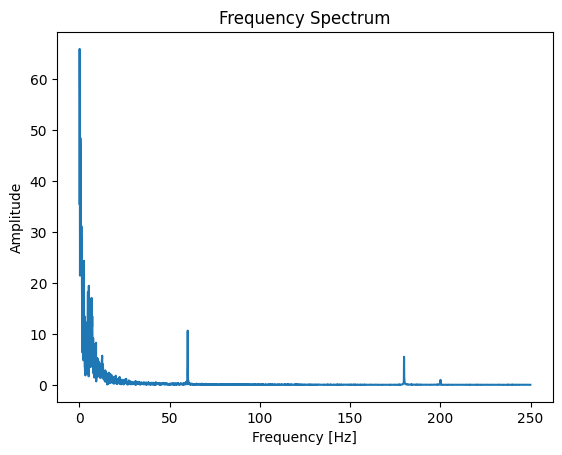

Power in Frequency Bands:
Delta: 56.475402424318446
Theta: 36.805001557293664
Alpha: 13.799301053073192
Beta: 18.620018203335746
Gamma: 3.0027945803433522


/var/folders/68/yblfghz56kv2rs33q5m_215c0000gn/T/ipykernel_92783/1633635538.py:32: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(power[band_freqs], freqs[band_freqs])


In [ ]:
# Perform Fast Fourier Transform (FFT)

data = scipy.io.loadmat(results+"_simulated_signals_prob1.mat")
X = data["X"]
T = 1.0 / sampling_rate  # Sampling interval (seconds)
L = X.shape[1]  # Length of the signal
t = np.arange(0.0, L * T, T)  # Time vector

yf = scipy.fft.fft(X)

xf = scipy.fft.fftfreq(L, T)[:L//2]  # Frequency axis

# Plot the frequency spectrum
plt.plot(xf, 2.0/L * np.abs(yf[0,:L//2]))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

# Define frequency bands (e.g., Delta, Theta, Alpha, Beta, Gamma)
frequency_bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 40)
}

# Function to extract power in frequency bands
def get_band_power(freqs, power, band):
    band_freqs = (freqs >= band[0]) & (freqs <= band[1])
    return np.trapz(power[band_freqs], freqs[band_freqs])

# Compute power spectrum
power_spectrum = 2.0 / L * np.abs(yf[0,:L//2])

# Extract power in each frequency band
band_powers = {}
for band, (low, high) in frequency_bands.items():
    band_power = get_band_power(xf, power_spectrum, (low, high))
    band_powers[band] = band_power

print('Power in Frequency Bands:')
for band, power in band_powers.items():
    print(f'{band}: {power}')
